# <font color='green'> <b>Car Price Prediction Project</b><font color='black'>

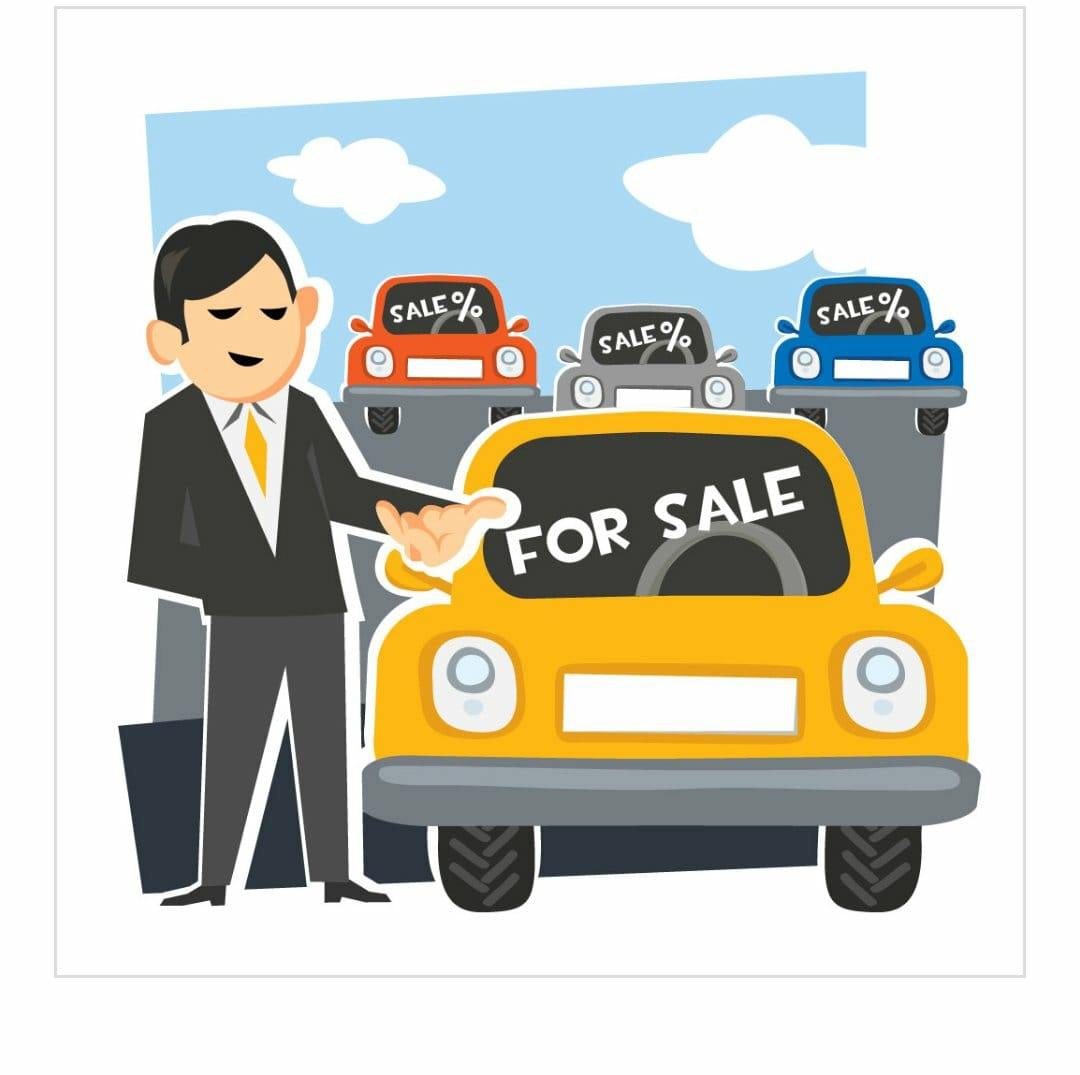

## <font color='blue'> <b>About the Dataset</b><font color='black'>

make_model: Contains the make and model information of the vehicles.<br>
body_type: Indicates the body type of the vehicles (e.g., sedan, hatchback).<br>
price: Contains the price information of the vehicles.<br>
vat: Contains value-added tax (VAT) information (often important in vehicle sales).<br>
km: Contains the mileage information of the vehicles.<br>
Type: Indicates the type of the vehicle (e.g., new, used).<br>
Fuel: Indicates the type of fuel used (e.g., petrol, diesel).<br>
Gears: Contains the number of gears in the vehicles.<br>
Comfort_Convenience: Contains the comfort and convenience features of the vehicles.<br>
Entertainment_Media: Contains entertainment and media features.<br>
Extras: Contains the extra features of the vehicles.<br>
Safety_Security: Contains safety features.<br>
age: The age of the vehicles.<br>
Previous_Owners: Contains the number of previous owners of the vehicles.<br>
hp_kW: Contains the horsepower of the vehicles in kilowatts.<br>
Inspection_new: Contains information about whether the vehicle has a new inspection.<br>
Paint_Type: Contains the type of paint of the vehicles.<br>
Upholstery_type: Contains the type of upholstery in the vehicles.<br>
Gearing_Type: Indicates the type of transmission in the vehicles.<br>
Displacement_cc: Indicates the engine displacement in cubic centimeters (cc).<br>
Weight_kg: Indicates the weight of the vehicles in kilograms.<br>
Drive_chain: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).<br>
cons_comb: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.<br>

## <font color='blue'> <b>Import Library</b><font color='black'>

In [352]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)  
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)  
pd.options.display.float_format = '{:.3f}'.format

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [353]:
df0 = pd.read_csv('final_scout_not_dummy.csv')
df = df0.copy()

## <font color='blue'> <b>Data Preprocessing</b><font color='black'>

In [354]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [356]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
336,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
337,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
339,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
340,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
341,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,Renault Espace,Van,50950,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1647.000,front,7.600
15820,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15823,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15808,Renault Espace,Van,54982,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1647.000,front,7.600


In [357]:
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")


duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [358]:
df.shape

(14242, 23)

In [359]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [360]:
df = df[df.hp_kW >50]

In [361]:
df.describe(include="object").T

,count,unique,top,freq
make_model,14239,9,Audi A3,2758
body_type,14239,8,Sedans,7230
vat,14239,2,VAT deductible,13423
Type,14239,5,Used,10170
Fuel,14239,4,Benzine,7556
Comfort_Convenience,14239,6195,"Air conditioning,Electrical side mirrors,Hill ...",312
Entertainment_Media,14239,346,"Bluetooth,Hands-free equipment,On-board comput...",1561
Extras,14239,659,Alloy wheels,5008
Safety_Security,14239,4441,"ABS,Central door lock,Daytime running lights,D...",635
Paint_Type,14239,3,Metallic,13679


## <font color='blue'> <b>Make Models</b><font color='black'>

In [362]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

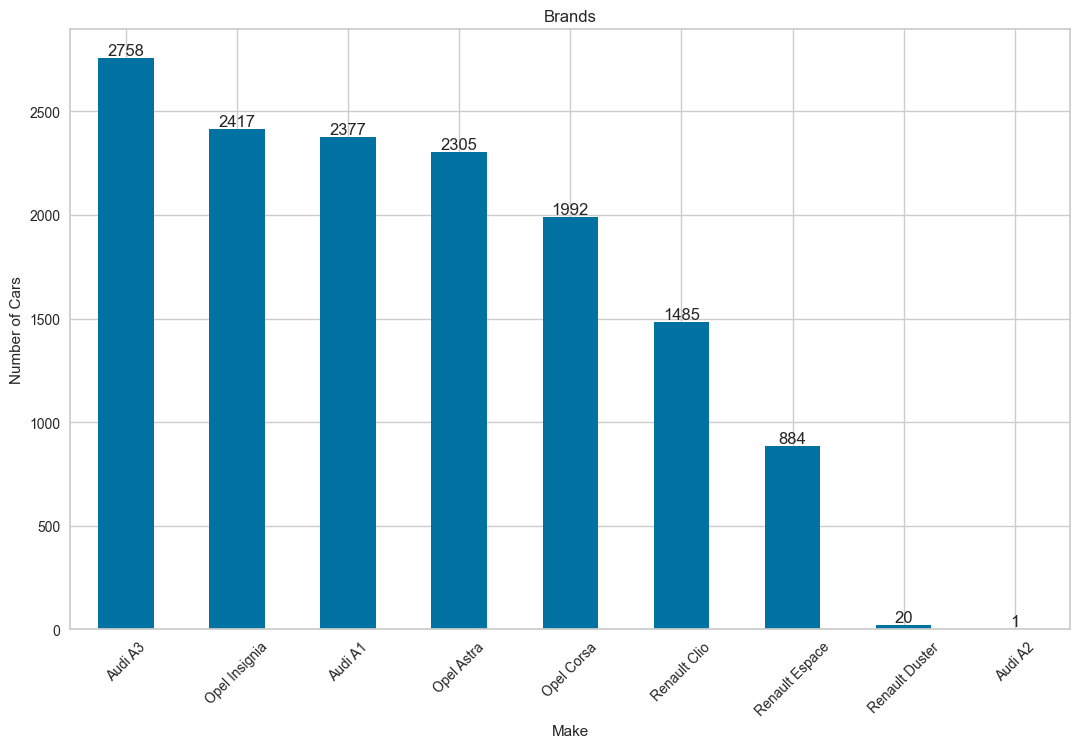

In [363]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.make_model.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Brands')   
plt.xlabel('Make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

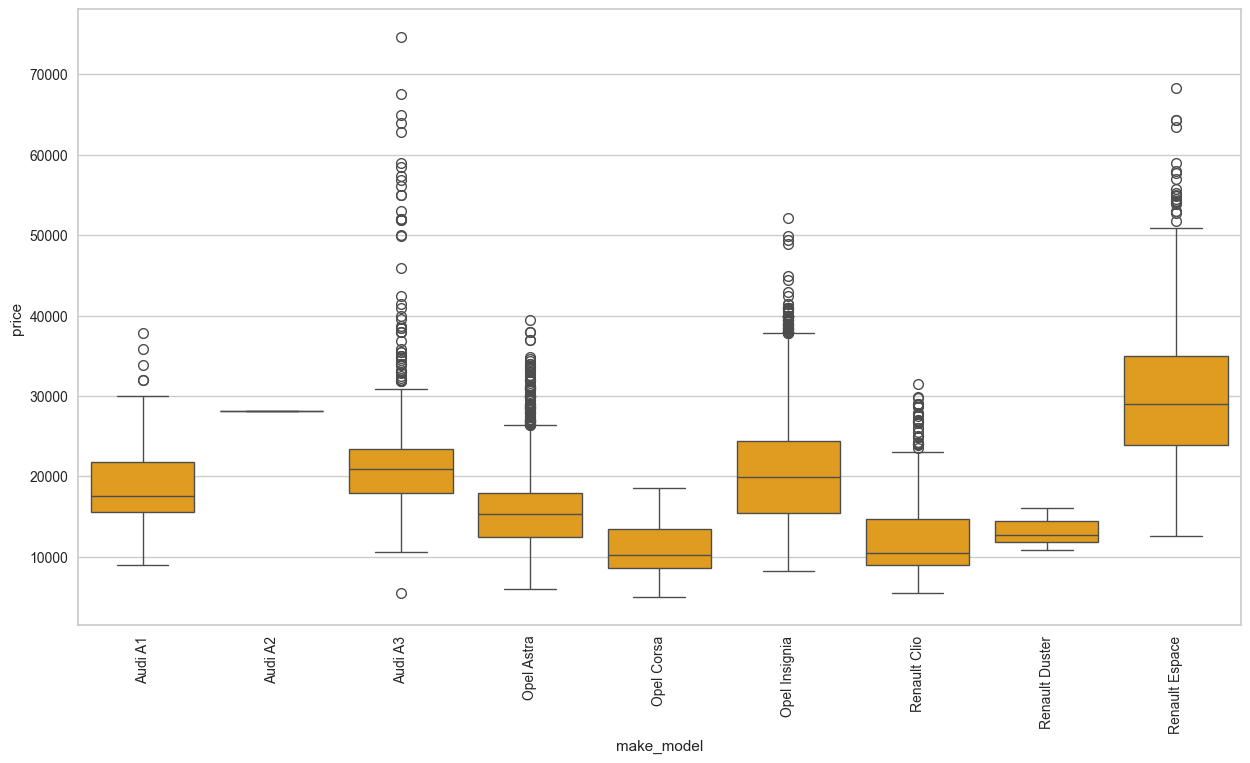

In [364]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Body Type</b><font color='black'>

In [365]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

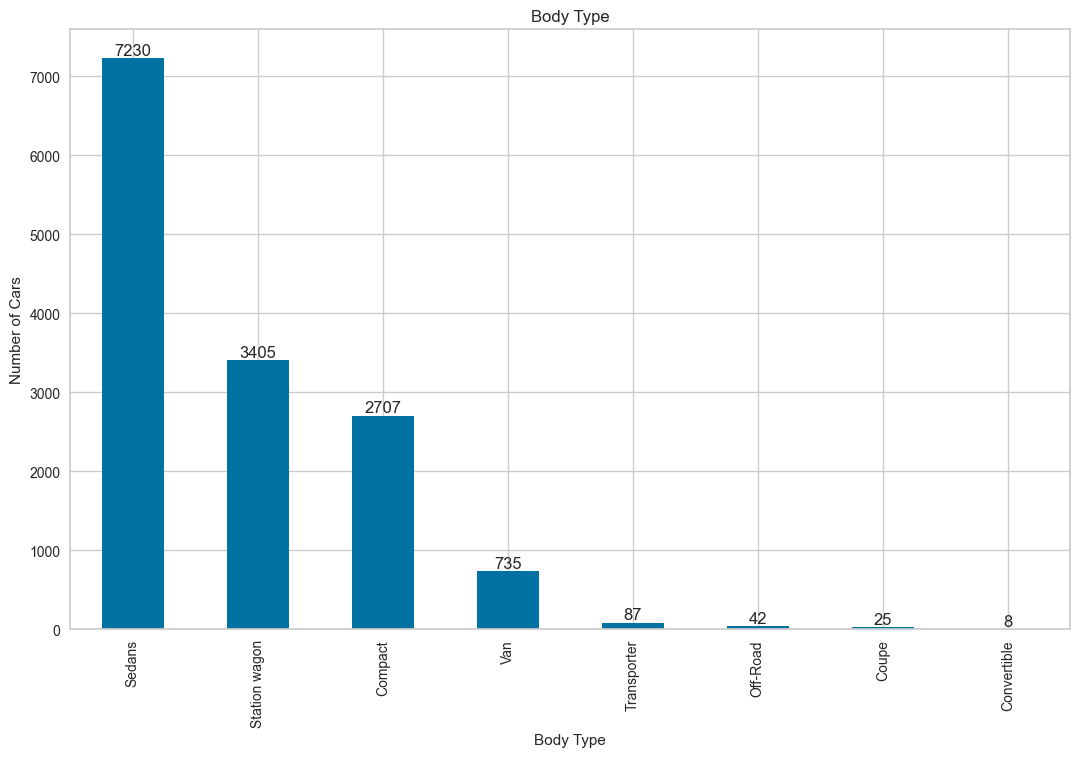

In [366]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.body_type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Body Type')   
plt.xlabel('Body Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [367]:
body_distr = df['body_type'].value_counts().reset_index(name='count')
body_distr.columns = ['body_type', 'count'] 

fig = px.pie(body_distr, values='count', names='body_type', title="Body Type Distribution")
fig.show()

## <font color='blue'> <b>VAT</b><font color='black'>

In [368]:
df.vat.unique()

array(['VAT deductible', 'Price negotiable'], dtype=object)

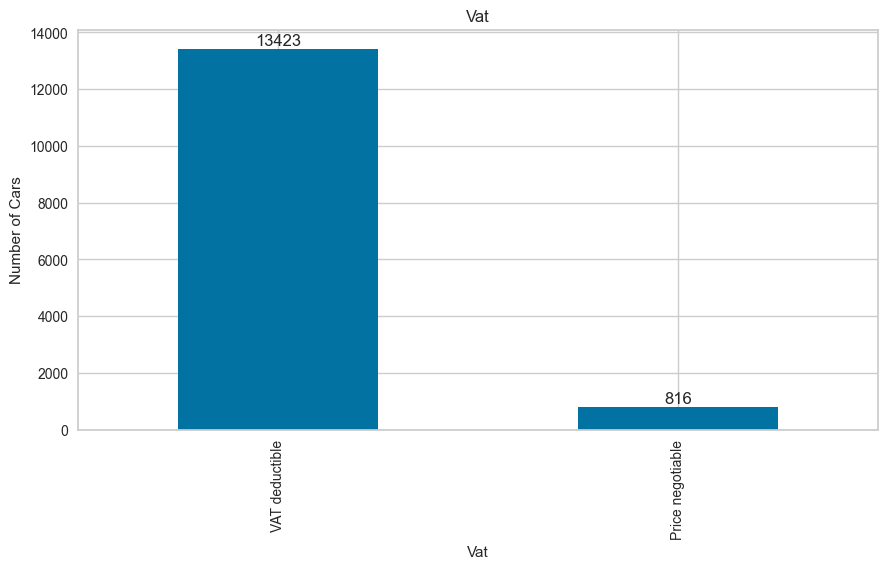

In [369]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_axes([0,0,1,1])
counts = df.vat.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vat')   
plt.xlabel('Vat') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Milage</b><font color='black'>

In [370]:
vc = df.km.value_counts()
print(f'max milace:{vc.max()}, average milage: {vc.mean()}, min milage: {vc.min()}')

max milace:841, average milage: 2.128718792046644, min milage: 1


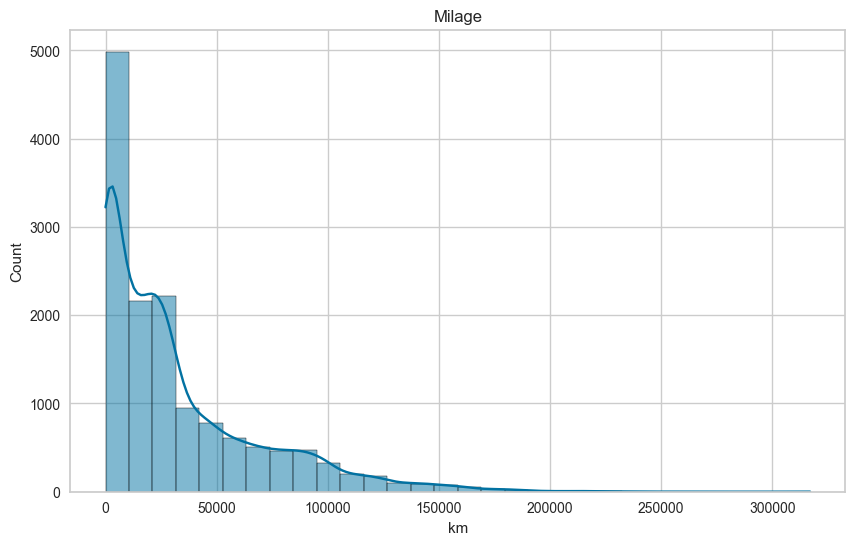

In [371]:
sns.histplot(data=df, x="km", bins=30, kde=True)
plt.title('Milage');

## <font color='blue'> <b>Type</b><font color='black'>

In [372]:
df.Type.unique()

array(['Used', "Employee's car", 'New', 'Demonstration', 'Pre-registered'],
      dtype=object)

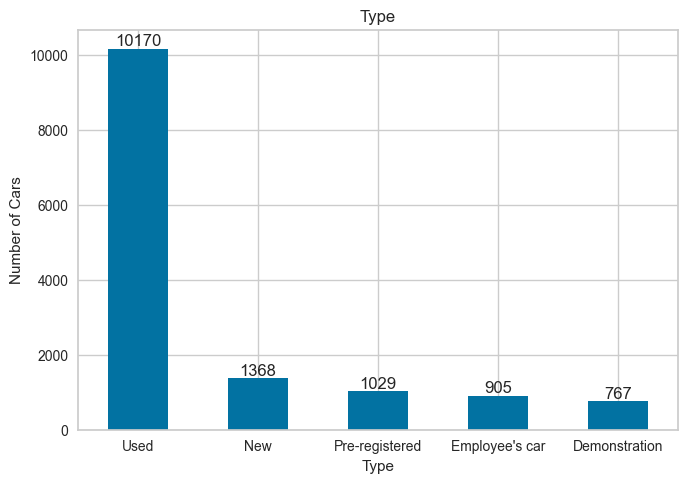

In [373]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Type.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Type')   
plt.xlabel('Type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Fuel Type</b><font color='black'>

In [374]:
df.Fuel.value_counts()

Fuel
Benzine     7556
Diesel      6618
LPG/CNG       60
Electric       5
Name: count, dtype: int64

In [375]:
df[df["Fuel"] == "Electric"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
3356,Audi A3,Compact,24950,VAT deductible,57000.000,Used,Electric,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",3.000,1.000,150.000,0,Metallic,Part/Full Leather,Semi-automatic,1400.000,1280.000,front,4.100
3612,Audi A3,Sedans,38450,Price negotiable,13800.000,Used,Electric,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Adaptive Cruise Control,Alarm system,Centr...",1.000,1.000,110.000,0,Metallic,Cloth,Semi-automatic,1395.000,1615.000,front,4.000
3615,Audi A3,Sedans,35899,Price negotiable,20880.000,Used,Electric,6.000,"Air conditioning,Power windows,Seat ventilatio...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",1.000,1.000,110.000,0,Metallic,Cloth,Semi-automatic,1395.000,1615.000,front,4.000
3617,Audi A3,Sedans,38000,Price negotiable,12000.000,Used,Electric,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Sport package,Sport...","ABS,Adaptive Cruise Control,Adaptive headlight...",1.000,1.000,110.000,0,Metallic,Part/Full Leather,Semi-automatic,1395.000,1615.000,front,4.000
13393,Renault Clio,Sedans,8490,VAT deductible,23863.000,Used,Electric,6.000,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,3.000,1.000,55.000,0,Metallic,Part/Full Leather,Automatic,1461.000,1165.000,front,5.000


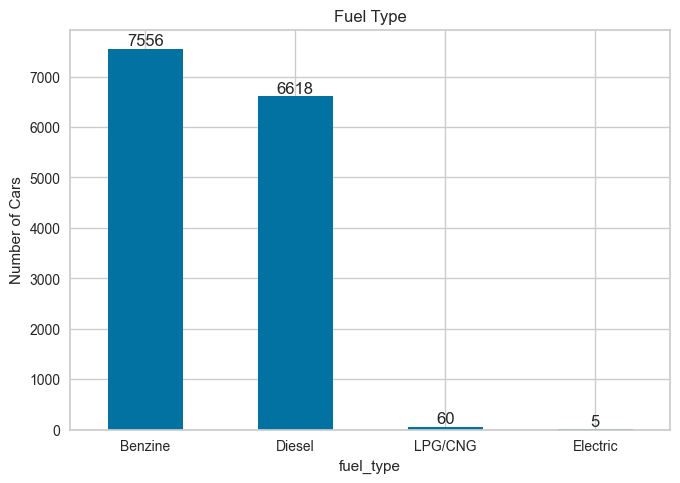

In [376]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Fuel.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Gears</b><font color='black'>

In [377]:
df.Gears.unique()

array([7., 6., 5., 8.])

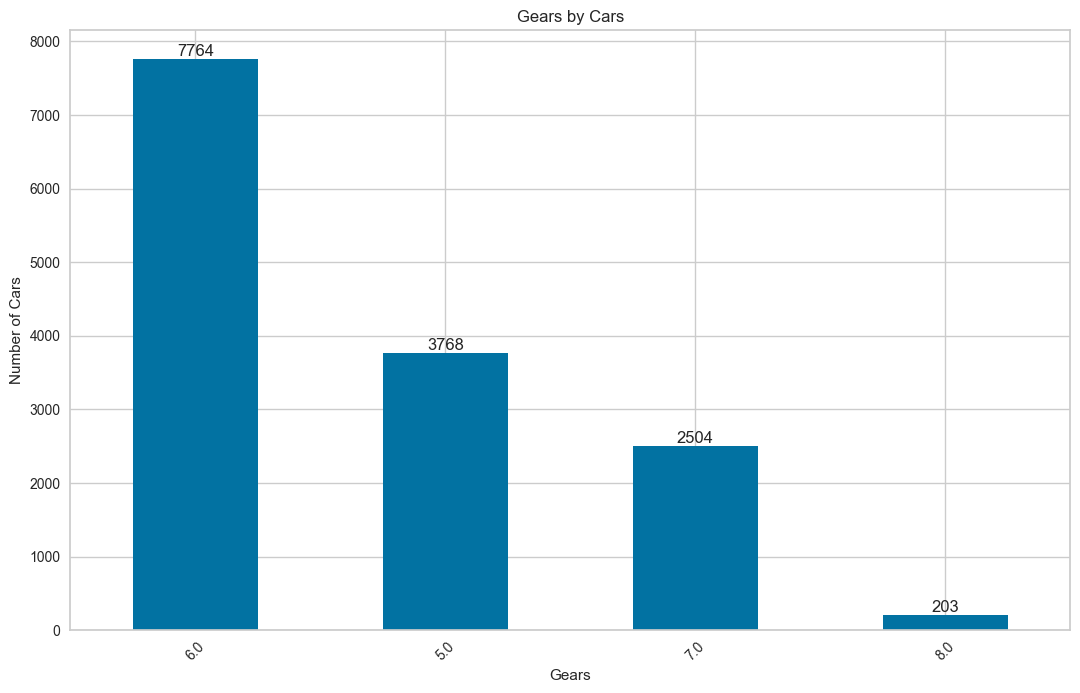

In [378]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Gears.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Gears by Cars')   
plt.xlabel('Gears') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Age</b><font color='black'>

In [379]:
df.age.value_counts()

age
1.000    4282
0.000    3694
3.000    3341
2.000    2922
Name: count, dtype: int64

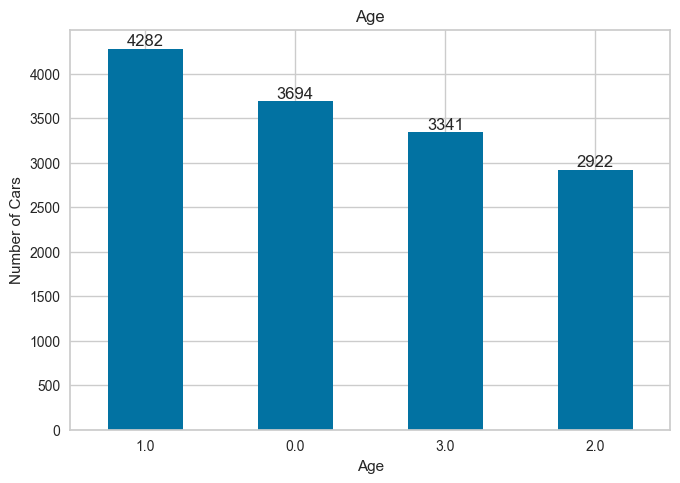

In [380]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.age.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Age')   
plt.xlabel('Age') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

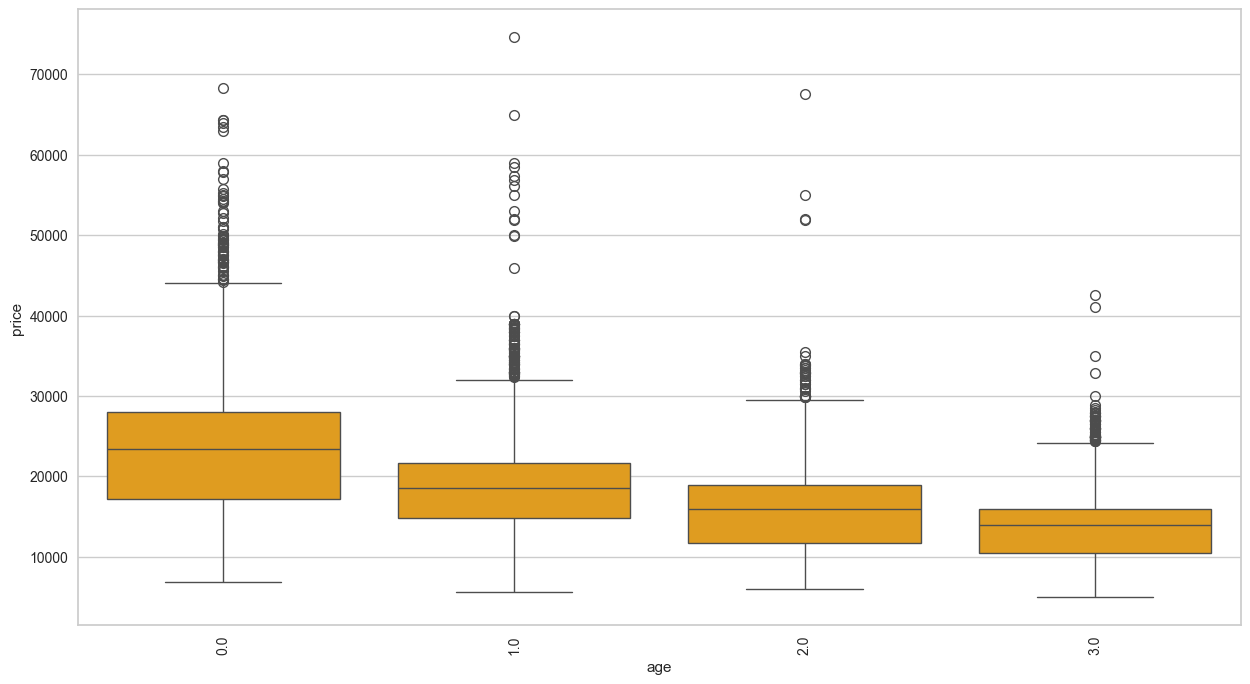

In [381]:
plt.figure(figsize = (15,8))
sns.boxplot(x="age", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Previous Owners</b><font color='black'>

In [382]:
df.Previous_Owners.unique()

array([2., 1., 0., 3., 4.])

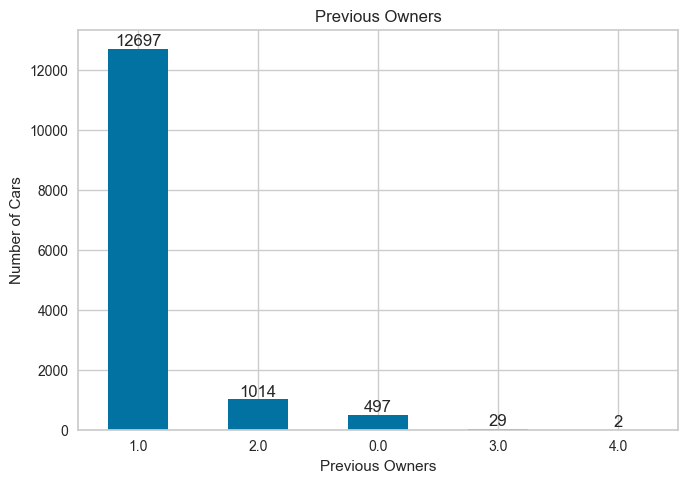

In [383]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Previous_Owners.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Previous Owners')   
plt.xlabel('Previous Owners') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

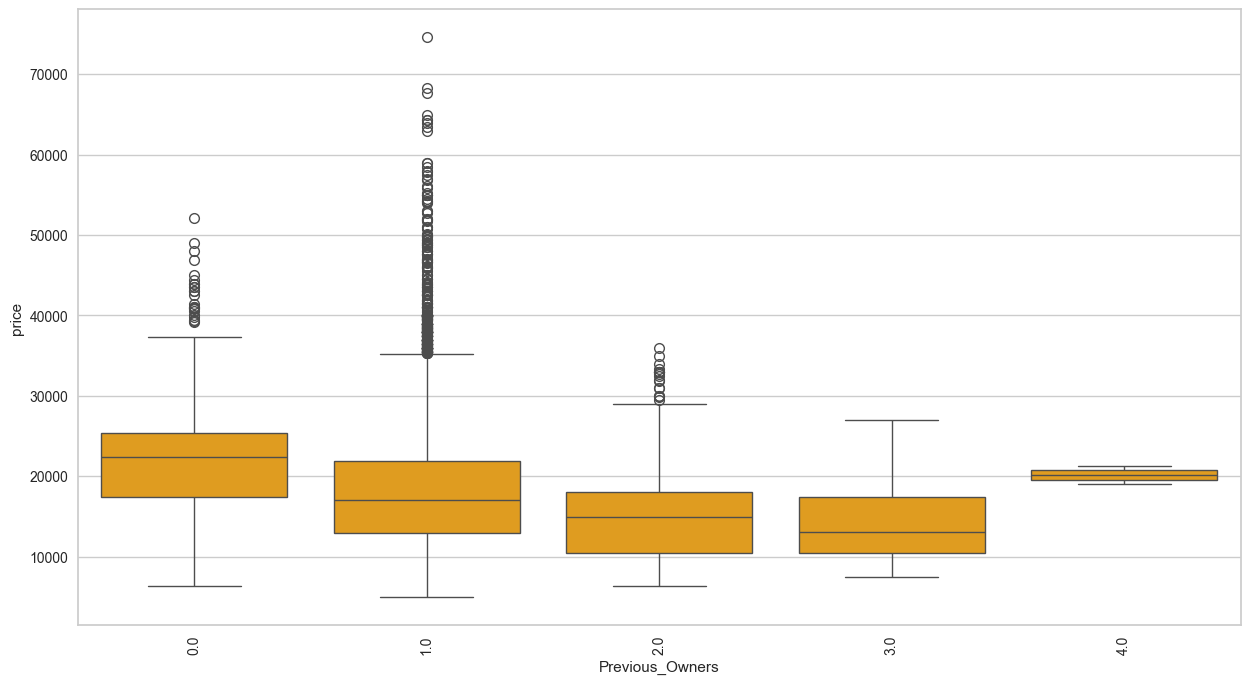

In [384]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Previous_Owners", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Power (hp_kW)</b><font color='black'>

In [385]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137., 133.,  77., 101.,  78., 103.,  74.,
       118.,  84.,  88.,  80.,  76., 149.,  51.,  55.,  52.,  63.,  65.,
        75., 125., 120., 184., 239., 121., 143., 191.,  89., 195., 127.,
       122., 154., 155., 104., 123., 146.,  90.,  56.,  53.,  54., 164.,
       163.,  57., 119., 165., 117., 115.,  98., 168., 167.])

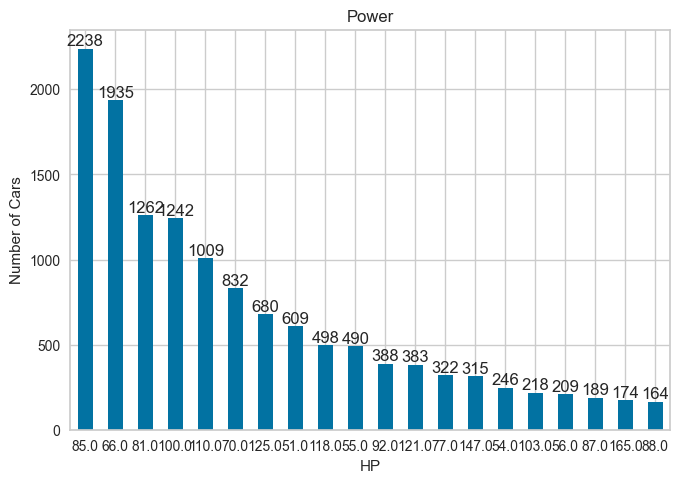

In [386]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.hp_kW.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Power')   
plt.xlabel('HP') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

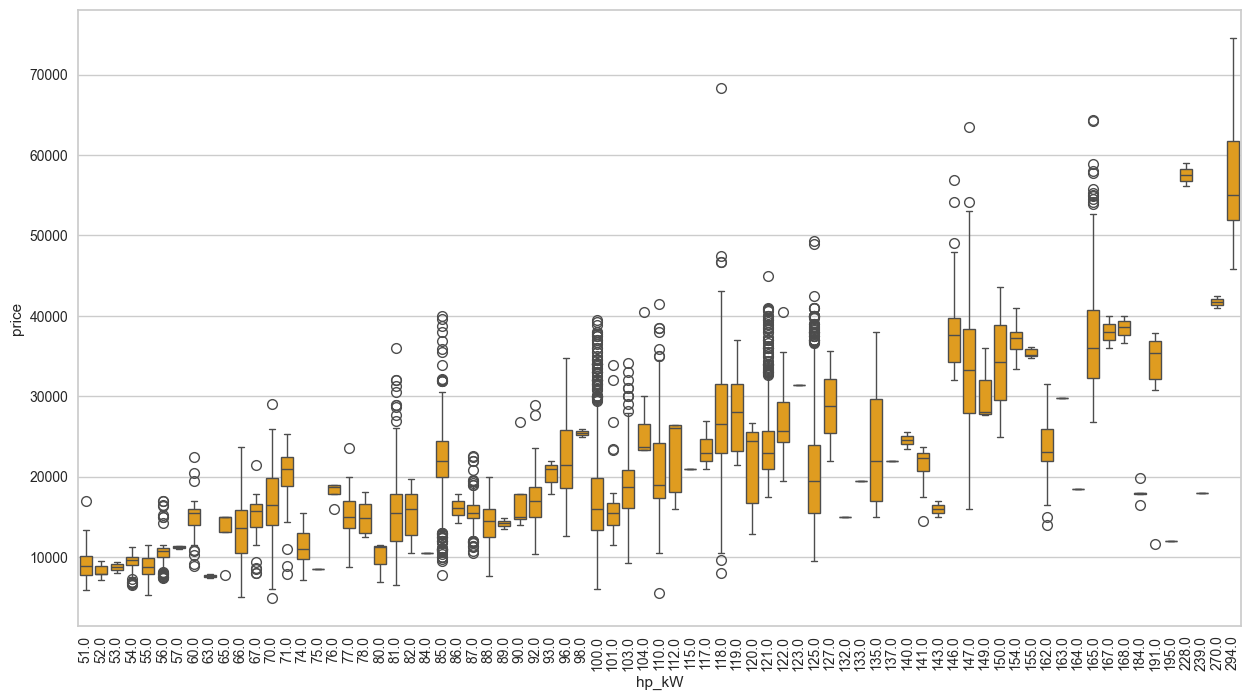

In [387]:
plt.figure(figsize = (15,8))
sns.boxplot(x="hp_kW", y="price", data=df, color='orange')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Displacement</b><font color='black'>

In [388]:
df.Displacement_cc.unique()

array([1422., 1798., 1598.,  999., 1395.,  929., 1596., 1600., 1000.,
       1984., 1498., 1197.,  995.,  998., 1968., 1400., 2000., 1568.,
       1896., 2480., 1499., 1495., 1398., 1584.,  997., 1399., 1364.,
       1490.,  996., 1696., 1686., 1396., 1368., 1397., 1248., 1229.,
       1300., 1200., 1239., 1350., 1369., 1390., 1198., 1195., 1956.,
       1998., 2967., 1856., 1500., 1496., 1533., 1599., 1995., 1461.,
       1618., 1149., 1199.,  898.,  890.,  900., 1100., 1333.,  899.,
       1589., 1580., 1997., 1800.])

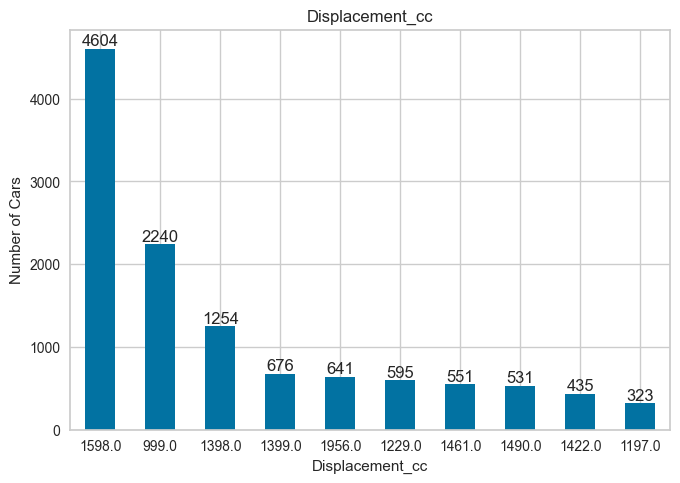

In [389]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Displacement_cc.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Displacement_cc')   
plt.xlabel('Displacement_cc') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Weight</b><font color='black'>

In [390]:
df.Weight_kg.value_counts(ascending=False)

Weight_kg
1163.000    1409
1360.000    1244
1487.000     919
1135.000     787
1425.000     707
1180.000     585
1273.000     570
1503.000     509
1734.000     506
1165.000     487
1335.000     223
1365.000     201
1199.000     197
1087.000     193
1350.000     150
1260.000     113
1275.000     105
1355.000     103
1522.000     103
1255.000     103
1119.000     101
1278.000      99
1195.000      94
1280.000      88
1200.000      84
1120.000      82
1403.000      81
1250.000      81
1659.000      81
1701.000      76
1110.000      75
1285.000      74
1613.000      72
1308.000      72
1364.000      69
1685.000      69
1279.000      69
1441.000      66
1733.000      64
1141.000      60
1230.000      57
1845.000      54
1664.000      52
1345.000      51
1513.000      51
1052.000      50
1065.000      50
1071.000      49
1090.000      48
1209.000      48
1205.000      46
1154.000      45
1440.000      45
1585.000      43
1162.000      42
1134.000      42
1395.000      42
1088.000      42
1237

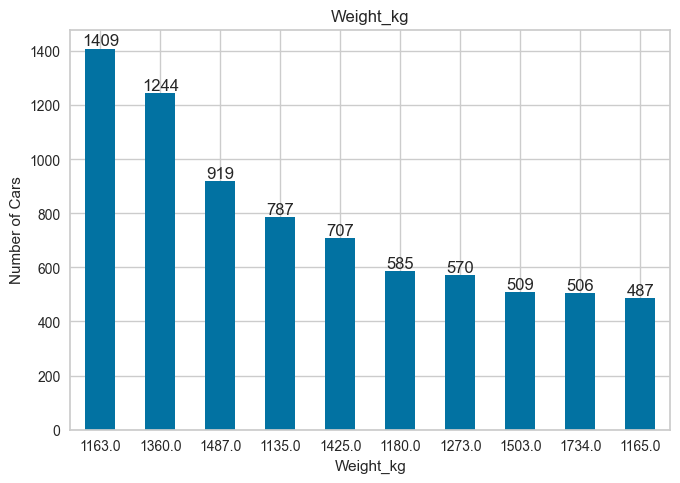

In [391]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Weight_kg.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('Weight_kg')   
plt.xlabel('Weight_kg') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>cons_comb</b><font color='black'>

In [392]:
df.cons_comb.value_counts(ascending=False)

cons_comb
5.600    917
4.000    915
5.400    750
4.700    725
4.500    708
3.900    681
5.000    667
4.400    648
4.200    564
3.800    556
4.800    528
5.100    519
5.300    472
4.900    465
5.200    403
4.600    373
4.100    335
3.700    333
5.700    332
5.500    329
6.000    313
5.900    306
4.300    282
3.500    243
3.300    224
6.200    213
3.600    198
6.100    160
5.800    143
6.600    141
6.300    135
3.400    106
6.800    101
6.400     72
3.000     64
7.400     58
6.700     39
7.100     36
6.500     27
3.200     25
6.900     21
8.300     20
3.450     19
7.600     12
7.000     10
3.100      7
7.200      6
8.000      5
8.600      4
3.650      4
7.800      3
8.700      3
5.150      3
3.950      3
7.300      2
5.450      2
4.550      2
7.900      2
8.100      2
4.300      1
9.100      1
7.500      1
Name: count, dtype: int64

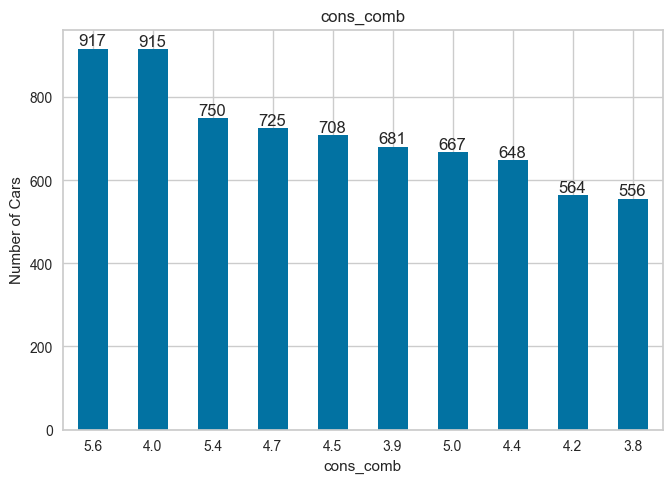

In [393]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.cons_comb.value_counts().sort_values(ascending=False).head(10)
counts.plot(kind = "bar")
plt.title('cons_comb')   
plt.xlabel('cons_comb') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Objest Variables and Dummy Operations</b><font color='black'>

In [394]:
df = df.join(df.Comfort_Convenience.str.get_dummies(sep=",").add_prefix('cc_'))
df = df.join(df.Entertainment_Media.str.get_dummies(sep=",").add_prefix('em_'))
df = df.join(df.Extras.str.get_dummies(sep=",").add_prefix('ex_'))
df =df.join(df.Safety_Security.str.get_dummies(sep=",").add_prefix('ss_'))
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first =True, dtype='int')

## <font color='blue'> <b>Price</b><font color='black'>

In [395]:
df[df.price == df.price.min()]

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
8825,4950,179521.000,5.000,3.000,1.000,70.000,0,1248.000,1163.000,3.200,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0


In [396]:
df[df.price == df.price.max()]

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
3648,74600,13000.000,7.000,1.000,1.000,294.000,0,2480.000,1490.000,8.300,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [397]:
corr = df.corr()["price"].sort_values()[:-1]
corr

age                                        -0.482
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.059
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Isofix                                  -0.045
ss_Central door lock                       -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


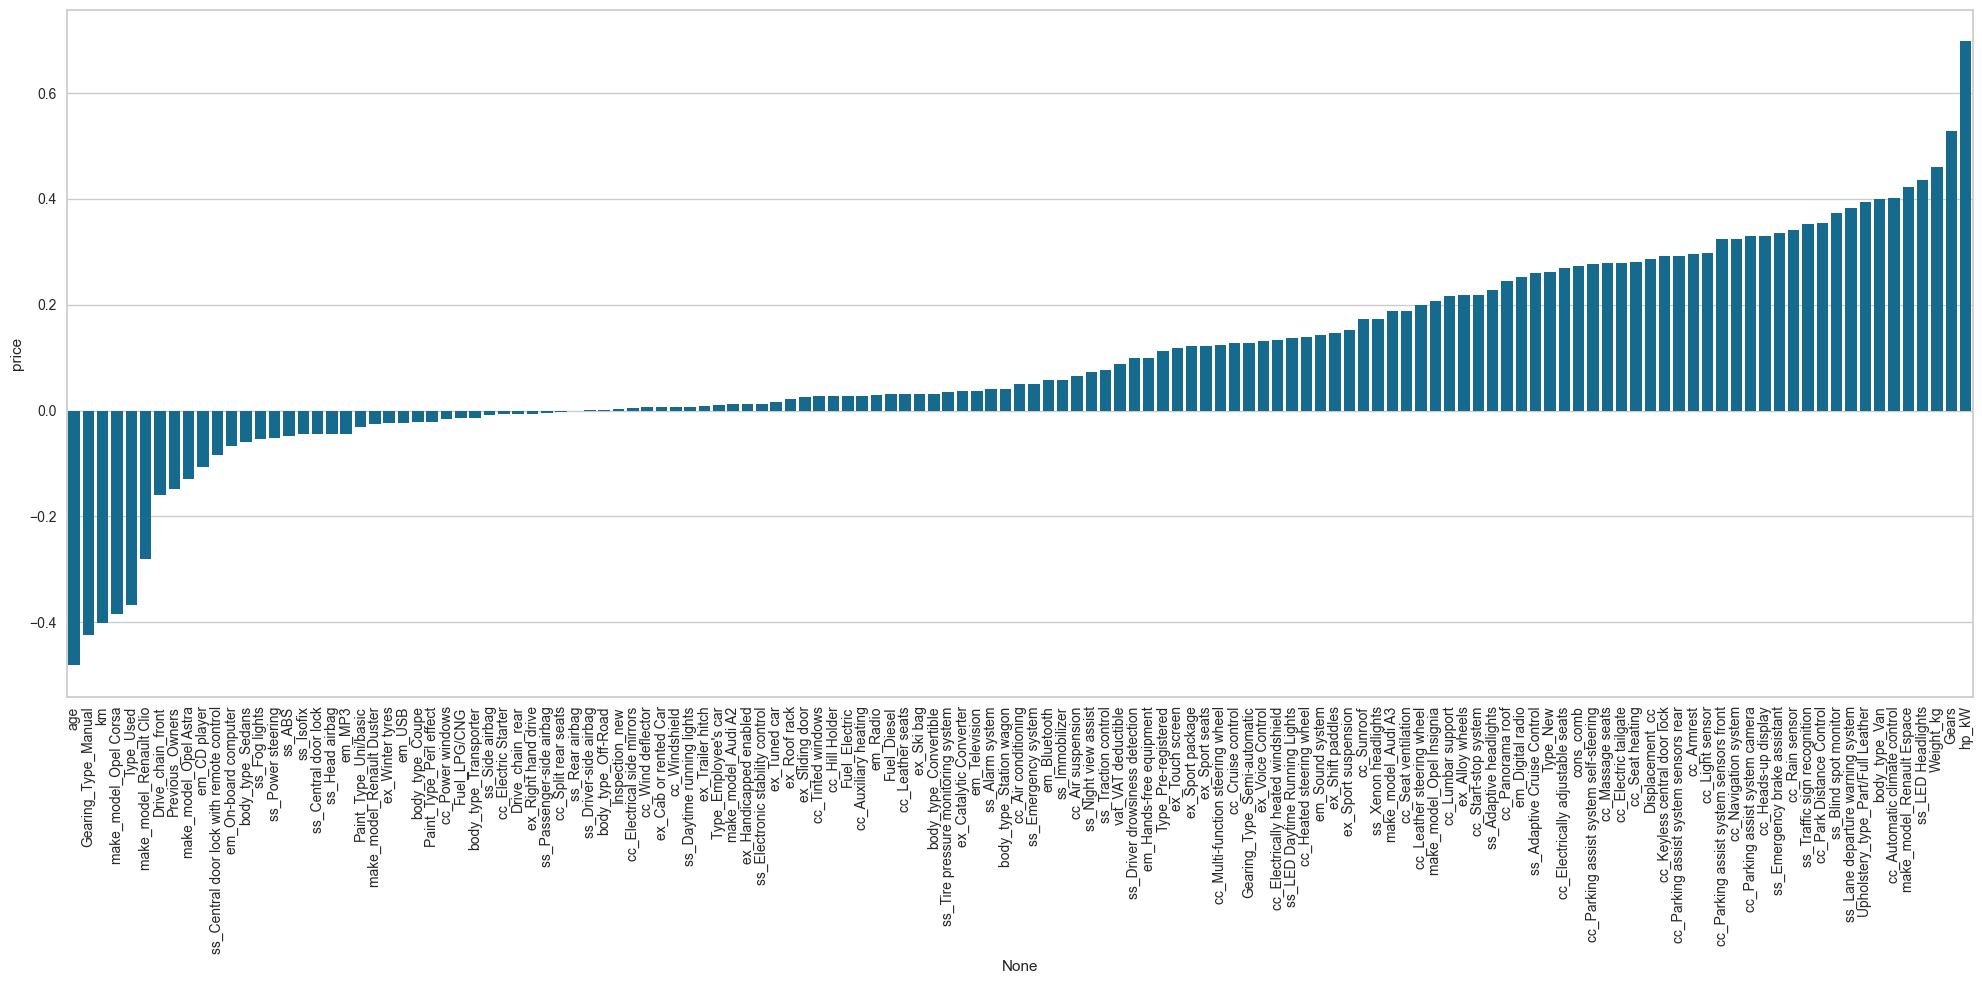

In [398]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr.index, y = corr)
plt.xticks(rotation=90)
plt.tight_layout();

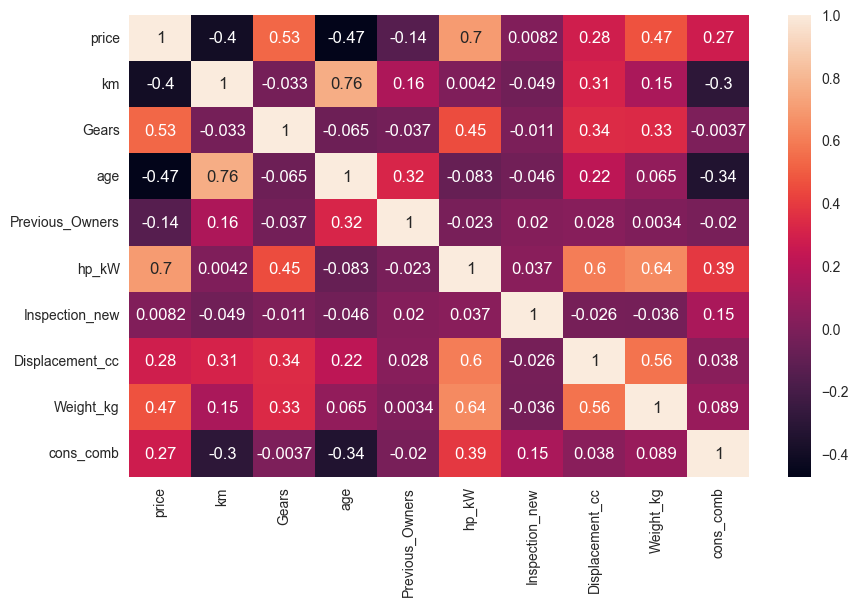

In [401]:
sns.heatmap(df0.select_dtypes(include ="number").corr(), annot =True);

In [402]:
df.isnull().sum().sum()

0

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [403]:
X = df.drop(['price'], axis=1)# independent variable
y = df['price'] # dependent variable

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [405]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11391, 133)
Train target shape   :  (11391,)
Test features shape  :  (2848, 133)
Test target shape    :  (2848,)


## <font color='blue'> <b>Scaling</b><font color='black'>

In [478]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [479]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

 76%|███████▌  | 32/42 [05:17<00:22,  2.21s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [06:42<00:04,  4.76s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 976
[LightGBM] [Info] Number of data points in the train set: 11012, number of used features: 121
[LightGBM] [Info] Start training from score 17335.985198


100%|██████████| 42/42 [06:43<00:00,  9.60s/it]


In [480]:
models[:]

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.948,0.951,1358.803,60.303
RandomForestRegressor,0.948,0.950,1363.853,51.734
XGBRegressor,0.946,0.949,1379.537,1.146
LGBMRegressor,0.945,0.948,1394.574,1.111
HistGradientBoostingRegressor,0.945,0.948,1398.493,3.015
BaggingRegressor,0.938,0.941,1484.149,5.797
GradientBoostingRegressor,0.925,0.928,1636.117,5.816
PoissonRegressor,0.903,0.908,1853.278,0.366
DecisionTreeRegressor,0.900,0.905,1880.132,0.847


## <font color='blue'> <b>Linear Regression</b><font color='black'>

In [407]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [408]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [409]:
lr.fit(X_train, y_train)

LinearRegression()

In [410]:
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [411]:
lrr = train_val(lr, X_train, y_train, X_test, y_test)
lrr

,train,test
R2,0.889,0.887
mae,1709.561,1732.141
mse,6059260.753,6390682.941
rmse,2461.557,2527.980


In [412]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Modelin R2 değerini hesaplar
    n = df.shape[0]                     # Veri setindeki gözlem (örnek) sayısını alır
    p = df.shape[1]-1                   # Bağımsız değişkenlerin (feature ların) sayısını alır 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Adjusted R2 formülünü kullanarak değeri hesaplar
    return adj_r2

In [413]:
y_pred = lr.predict(X_test)

In [414]:
adj_r2(y_test, y_pred, df)

0.8861234558153102

## <font color='blue'> <b>Cross Validation</b><font color='black'>

In [415]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [416]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.242,0.005,0.880,0.890,-1699.958,-1715.306,-5701553.701,-6107996.977,-2387.793,-2471.436
1,0.192,0.016,0.885,0.889,-1790.202,-1706.610,-6632290.168,-6006869.225,-2575.323,-2450.892
2,0.209,0.000,0.847,0.889,-1761.238,-1708.874,-8355687.338,-6049158.879,-2890.621,-2459.504
3,0.183,0.000,0.109,0.890,-2090.274,-1687.004,-58589701.017,-5873800.523,-7654.391,-2423.592
4,0.236,0.017,0.876,0.890,-1739.666,-1708.767,-6288085.766,-6051819.444,-2507.606,-2460.045
5,0.279,0.000,0.284,0.890,-1884.144,-1720.705,-37812526.359,-6057515.843,-6149.189,-2461.202
6,0.290,0.011,0.890,0.889,-1748.970,-1705.002,-6040615.170,-6073017.725,-2457.766,-2464.349
7,0.184,0.000,0.885,0.889,-1732.618,-1710.945,-6315835.836,-6040471.769,-2513.133,-2457.737
8,0.185,0.015,0.894,0.888,-1708.820,-1709.733,-5648458.984,-6116942.856,-2376.649,-2473.245
9,0.216,0.000,0.891,0.889,-1720.232,-1712.098,-5866161.528,-6094964.210,-2422.016,-2468.798


In [417]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.744
train_r2                                    0.889
test_neg_mean_absolute_error            -1787.612
train_neg_mean_absolute_error           -1708.504
test_neg_mean_squared_error         -14725091.587
train_neg_mean_squared_error         -6047255.745
test_neg_root_mean_squared_error        -3393.449
train_neg_root_mean_squared_error       -2459.080
dtype: float64

In [419]:
train_val(lr, X_train, y_train, X_test, y_test)

,train,test
R2,0.889,0.887
mae,1709.561,1732.141
mse,6059260.753,6390682.941
rmse,2461.557,2527.980


In [420]:
2501/df.price.mean()

0.13815421068195144

In [421]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

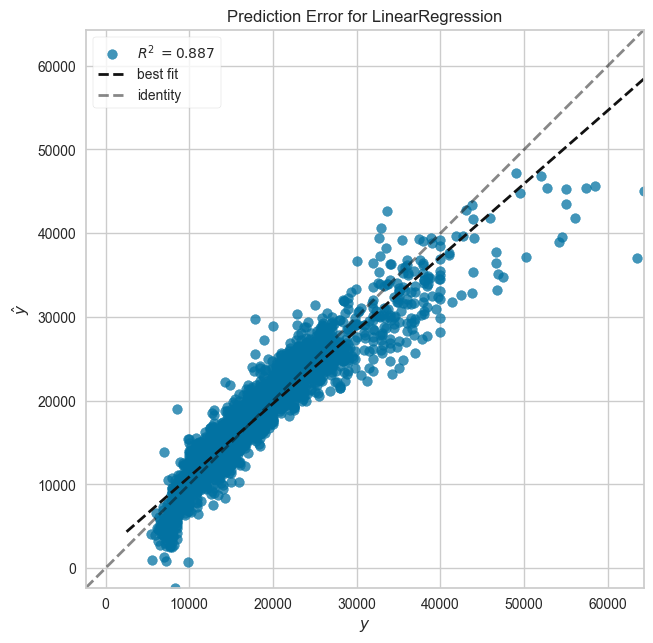

In [422]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

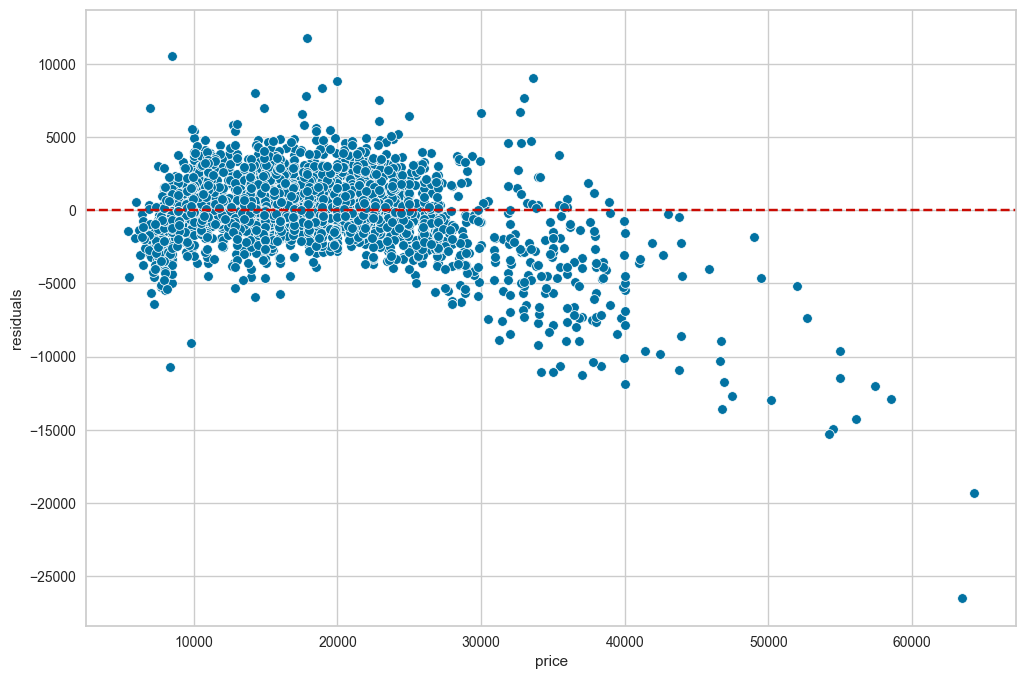

In [423]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

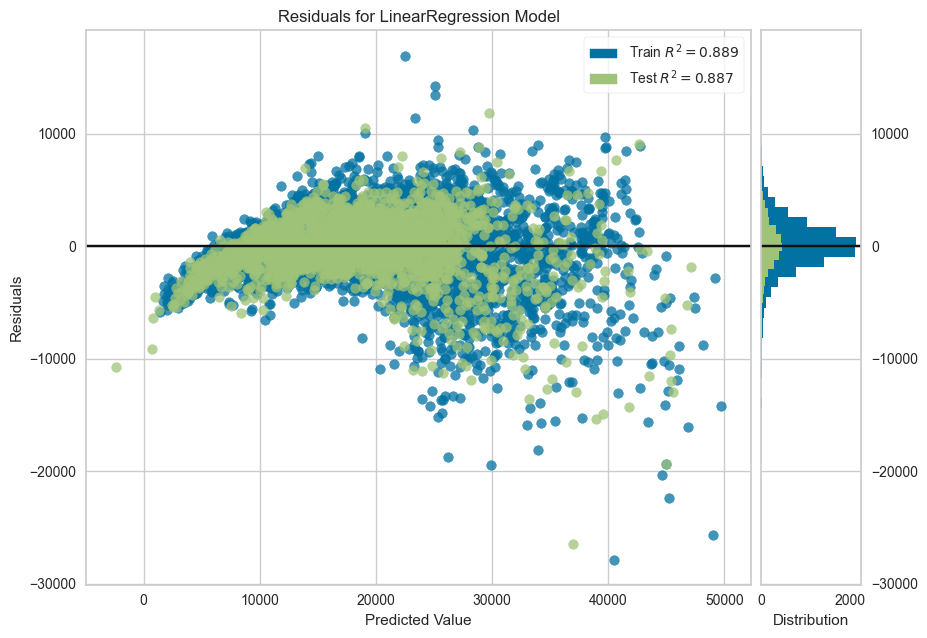

In [424]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

#### <font color='blue'> <b>Dropping observations from the dataset that worsen my predictions</b><font color='black'>

In [425]:
df1 = df[~(df.price>35000)]
df1.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,

In [426]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [427]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

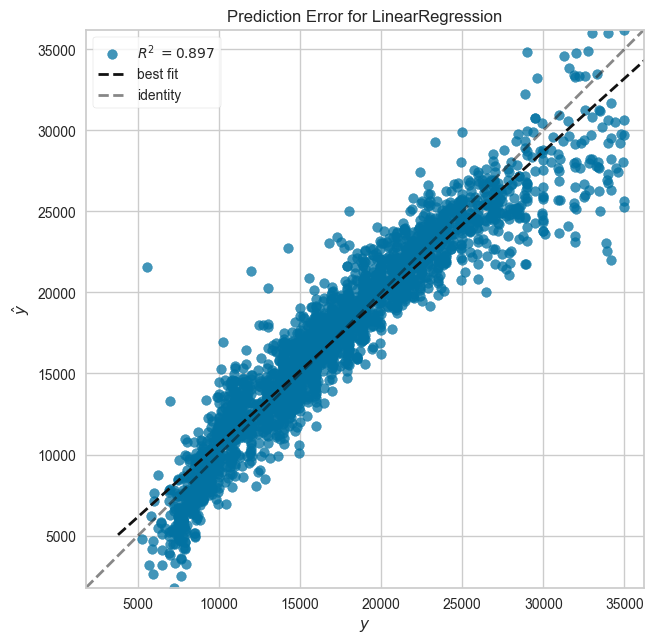

In [428]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [429]:
train_val(lr2, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.897
mae,1414.689,1410.872
mse,3789824.326,3840648.962
rmse,1946.747,1959.757


In [430]:
1959/df1.price.mean()

0.1131112405484233

In [431]:
2501/df.price.mean()

0.13815421068195144

In [432]:
pd.DataFrame(lr2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9345.160
make_model_Renault Clio,-5393.440
make_model_Opel Corsa,-5283.142
make_model_Opel Astra,-3306.873
Type_Employee's car,-2135.404
Type_Used,-1957.189
Drive_chain_rear,-1683.894
Gearing_Type_Manual,-1600.531
age,-1462.061
Type_Pre-registered,-1283.493


## <font color='blue'> <b>RidgeCV</b><font color='black'>

In [433]:
from sklearn.linear_model import RidgeCV

In [438]:
alpha = np.linspace(0.01, 1, 100)
alpha

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [439]:
ridge_cv = RidgeCV(alphas = alpha, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [440]:
ridge_cv.alpha_

0.5700000000000001

In [441]:
y_pred = ridge_cv.predict(X_test)
y_train_pred = ridge_cv.predict(X_train)

In [442]:
rcv = train_val(ridge_cv, X_train, y_train, X_test, y_test)
rcv

,train,test
R2,0.898,0.897
mae,1415.062,1410.856
mse,3790885.102,3839874.595
rmse,1947.020,1959.560


In [443]:
ridge_cv.coef_

array([-3.59274393e-02,  6.02980203e+02, -1.46140628e+03,  2.22042308e+02,
        7.16078797e+01, -1.26750521e+01, -1.17429443e+00, -1.10933368e+00,
        2.15938360e+01,  3.44869812e+02, -2.50804123e+02,  2.91508039e+01,
        1.69334016e+02,  1.32868791e+02,  2.76356037e+02, -6.67230262e+02,
       -1.47025583e+02, -1.00551987e+02, -7.60265186e+01,  1.16564714e+02,
        5.33598375e+02,  9.06022864e+01,  1.50508027e+01,  3.51326749e+02,
       -2.84118784e+02,  1.82879059e+02,  7.45165142e+01, -2.40778163e+02,
        7.37587062e+02,  2.02372221e+02,  2.06216850e+02, -3.81902897e+02,
        4.53230631e+02,  1.44029672e+02,  1.97001851e+02,  1.04358645e+02,
       -3.40121717e+02, -1.76913282e+02, -1.10537435e+02,  1.06934009e+02,
        1.44005201e+02, -5.87661953e+01,  2.04886990e+02,  4.34400350e+02,
        2.19296476e+02, -9.65241977e+02,  1.00825443e+02, -2.43465484e+02,
       -1.70294705e+02,  5.83078317e+02,  1.33677458e+01,  6.81841228e+01,
       -9.89585884e+01,  

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [444]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

## <font color='blue'> <b>LassoCV</b><font color='black'>

In [445]:
from sklearn.linear_model import Lasso, LassoCV

In [450]:
alpha = np.linspace(0.01, 2, 100)
alpha

array([0.01      , 0.03010101, 0.05020202, 0.07030303, 0.09040404,
       0.11050505, 0.13060606, 0.15070707, 0.17080808, 0.19090909,
       0.2110101 , 0.23111111, 0.25121212, 0.27131313, 0.29141414,
       0.31151515, 0.33161616, 0.35171717, 0.37181818, 0.39191919,
       0.4120202 , 0.43212121, 0.45222222, 0.47232323, 0.49242424,
       0.51252525, 0.53262626, 0.55272727, 0.57282828, 0.59292929,
       0.6130303 , 0.63313131, 0.65323232, 0.67333333, 0.69343434,
       0.71353535, 0.73363636, 0.75373737, 0.77383838, 0.79393939,
       0.8140404 , 0.83414141, 0.85424242, 0.87434343, 0.89444444,
       0.91454545, 0.93464646, 0.95474747, 0.97484848, 0.99494949,
       1.01505051, 1.03515152, 1.05525253, 1.07535354, 1.09545455,
       1.11555556, 1.13565657, 1.15575758, 1.17585859, 1.1959596 ,
       1.21606061, 1.23616162, 1.25626263, 1.27636364, 1.29646465,
       1.31656566, 1.33666667, 1.35676768, 1.37686869, 1.3969697 ,
       1.41707071, 1.43717172, 1.45727273, 1.47737374, 1.49747

In [451]:
lasso_cv = LassoCV(alphas=alpha, cv=5, max_iter=10000, random_state=19)

In [452]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.01      , 0.03010101, 0.05020202, 0.07030303, 0.09040404,
       0.11050505, 0.13060606, 0.15070707, 0.17080808, 0.19090909,
       0.2110101 , 0.23111111, 0.25121212, 0.27131313, 0.29141414,
       0.31151515, 0.33161616, 0.35171717, 0.37181818, 0.39191919,
       0.4120202 , 0.43212121, 0.45222222, 0.47232323, 0.49242424,
       0.51252525, 0.53262626, 0.55272727, 0.57282828, 0.59292929,
       0.6130...
       1.41707071, 1.43717172, 1.45727273, 1.47737374, 1.49747475,
       1.51757576, 1.53767677, 1.55777778, 1.57787879, 1.5979798 ,
       1.61808081, 1.63818182, 1.65828283, 1.67838384, 1.69848485,
       1.71858586, 1.73868687, 1.75878788, 1.77888889, 1.7989899 ,
       1.81909091, 1.83919192, 1.85929293, 1.87939394, 1.89949495,
       1.91959596, 1.93969697, 1.95979798, 1.97989899, 2.        ]),
        cv=5, max_iter=10000, random_state=19)

In [453]:
lasso_cv.alpha_

0.793939393939394

In [454]:
y_pred = lasso_cv.predict(X_test)
y_train_pred = lasso_cv.predict(X_train)

In [455]:
lcv = train_val(lasso_cv, X_train, y_train, X_test, y_test)
lcv

,train,test
R2,0.897,0.898
mae,1415.812,1407.826
mse,3803206.930,3824888.242
rmse,1950.181,1955.732


In [458]:
lasso_cv.coef_

array([-3.59434226e-02,  6.08038256e+02, -1.46378118e+03,  2.13321760e+02,
        7.23218316e+01, -4.46963905e+00, -1.17493123e+00, -1.06627862e+00,
        1.12151604e+01,  3.19212558e+02, -8.62016601e+01,  2.48669540e+01,
        1.71083006e+02,  6.99192746e+01,  2.72322843e+02, -0.00000000e+00,
       -1.20041159e+02, -9.29820320e+01, -6.18587739e+01,  1.03703829e+02,
        4.99650563e+02,  7.99403804e+01,  3.76902445e+00,  3.43305843e+02,
       -8.94081264e+01,  1.79063173e+02,  6.06287921e+01, -2.33836899e+02,
        6.48590225e+02,  1.91546513e+02,  2.02135905e+02, -3.25515460e+02,
        4.42979241e+02,  1.37621583e+02,  1.98188755e+02,  9.28484237e+01,
       -3.12705238e+02, -1.60528690e+02, -9.30466019e+01,  1.12231436e+02,
        1.38650249e+02, -4.44479502e+01,  1.94131678e+02,  3.62455295e+02,
        1.92150648e+02, -7.57843900e+02,  0.00000000e+00, -2.35626324e+02,
       -1.66885707e+02,  5.72708871e+02,  2.28801901e+00,  6.54528778e+01,
       -9.26383777e+01,  

## <font color='blue'> <b>ElasticNetCV</b><font color='black'>

In [459]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [464]:
alpha = np.linspace(0.01, 2, 100)
alpha

array([0.01      , 0.03010101, 0.05020202, 0.07030303, 0.09040404,
       0.11050505, 0.13060606, 0.15070707, 0.17080808, 0.19090909,
       0.2110101 , 0.23111111, 0.25121212, 0.27131313, 0.29141414,
       0.31151515, 0.33161616, 0.35171717, 0.37181818, 0.39191919,
       0.4120202 , 0.43212121, 0.45222222, 0.47232323, 0.49242424,
       0.51252525, 0.53262626, 0.55272727, 0.57282828, 0.59292929,
       0.6130303 , 0.63313131, 0.65323232, 0.67333333, 0.69343434,
       0.71353535, 0.73363636, 0.75373737, 0.77383838, 0.79393939,
       0.8140404 , 0.83414141, 0.85424242, 0.87434343, 0.89444444,
       0.91454545, 0.93464646, 0.95474747, 0.97484848, 0.99494949,
       1.01505051, 1.03515152, 1.05525253, 1.07535354, 1.09545455,
       1.11555556, 1.13565657, 1.15575758, 1.17585859, 1.1959596 ,
       1.21606061, 1.23616162, 1.25626263, 1.27636364, 1.29646465,
       1.31656566, 1.33666667, 1.35676768, 1.37686869, 1.3969697 ,
       1.41707071, 1.43717172, 1.45727273, 1.47737374, 1.49747

In [465]:
elastic_cv = ElasticNetCV(alphas = alpha,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [466]:
elastic_cv.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01      , 0.03010101, 0.05020202, 0.07030303, 0.09040404,
       0.11050505, 0.13060606, 0.15070707, 0.17080808, 0.19090909,
       0.2110101 , 0.23111111, 0.25121212, 0.27131313, 0.29141414,
       0.31151515, 0.33161616, 0.35171717, 0.37181818, 0.39191919,
       0.4120202 , 0.43212121, 0.45222222, 0.47232323, 0.49242424,
       0.51252525, 0.53262626, 0.55272727, 0.57282828, 0.59292929,
       0...
       1.41707071, 1.43717172, 1.45727273, 1.47737374, 1.49747475,
       1.51757576, 1.53767677, 1.55777778, 1.57787879, 1.5979798 ,
       1.61808081, 1.63818182, 1.65828283, 1.67838384, 1.69848485,
       1.71858586, 1.73868687, 1.75878788, 1.77888889, 1.7989899 ,
       1.81909091, 1.83919192, 1.85929293, 1.87939394, 1.89949495,
       1.91959596, 1.93969697, 1.95979798, 1.97989899, 2.        ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [467]:
elastic_cv.alpha_

0.793939393939394

In [468]:
elastic_cv.l1_ratio_

1.0

In [469]:
y_pred = elastic_cv.predict(X_test)
y_train_pred = elastic_cv.predict(X_train)

In [474]:
ecv = train_val(elastic_cv, X_train, y_train_pred, X_test, y_pred)
ecv

,train,test
R2,1.000,1.000
mae,0.000,0.000
mse,0.000,0.000
rmse,0.000,0.000


In [473]:
elastic_cv.coef_

array([-3.59434226e-02,  6.08038256e+02, -1.46378118e+03,  2.13321760e+02,
        7.23218316e+01, -4.46963905e+00, -1.17493123e+00, -1.06627862e+00,
        1.12151604e+01,  3.19212558e+02, -8.62016601e+01,  2.48669540e+01,
        1.71083006e+02,  6.99192746e+01,  2.72322843e+02, -0.00000000e+00,
       -1.20041159e+02, -9.29820320e+01, -6.18587739e+01,  1.03703829e+02,
        4.99650563e+02,  7.99403804e+01,  3.76902445e+00,  3.43305843e+02,
       -8.94081264e+01,  1.79063173e+02,  6.06287921e+01, -2.33836899e+02,
        6.48590225e+02,  1.91546513e+02,  2.02135905e+02, -3.25515460e+02,
        4.42979241e+02,  1.37621583e+02,  1.98188755e+02,  9.28484237e+01,
       -3.12705238e+02, -1.60528690e+02, -9.30466019e+01,  1.12231436e+02,
        1.38650249e+02, -4.44479502e+01,  1.94131678e+02,  3.62455295e+02,
        1.92150648e+02, -7.57843900e+02,  0.00000000e+00, -2.35626324e+02,
       -1.66885707e+02,  5.72708871e+02,  2.28801901e+00,  6.54528778e+01,
       -9.26383777e+01,  

## <font color='blue'> <b>Feature Importance</b><font color='black'>

In [476]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

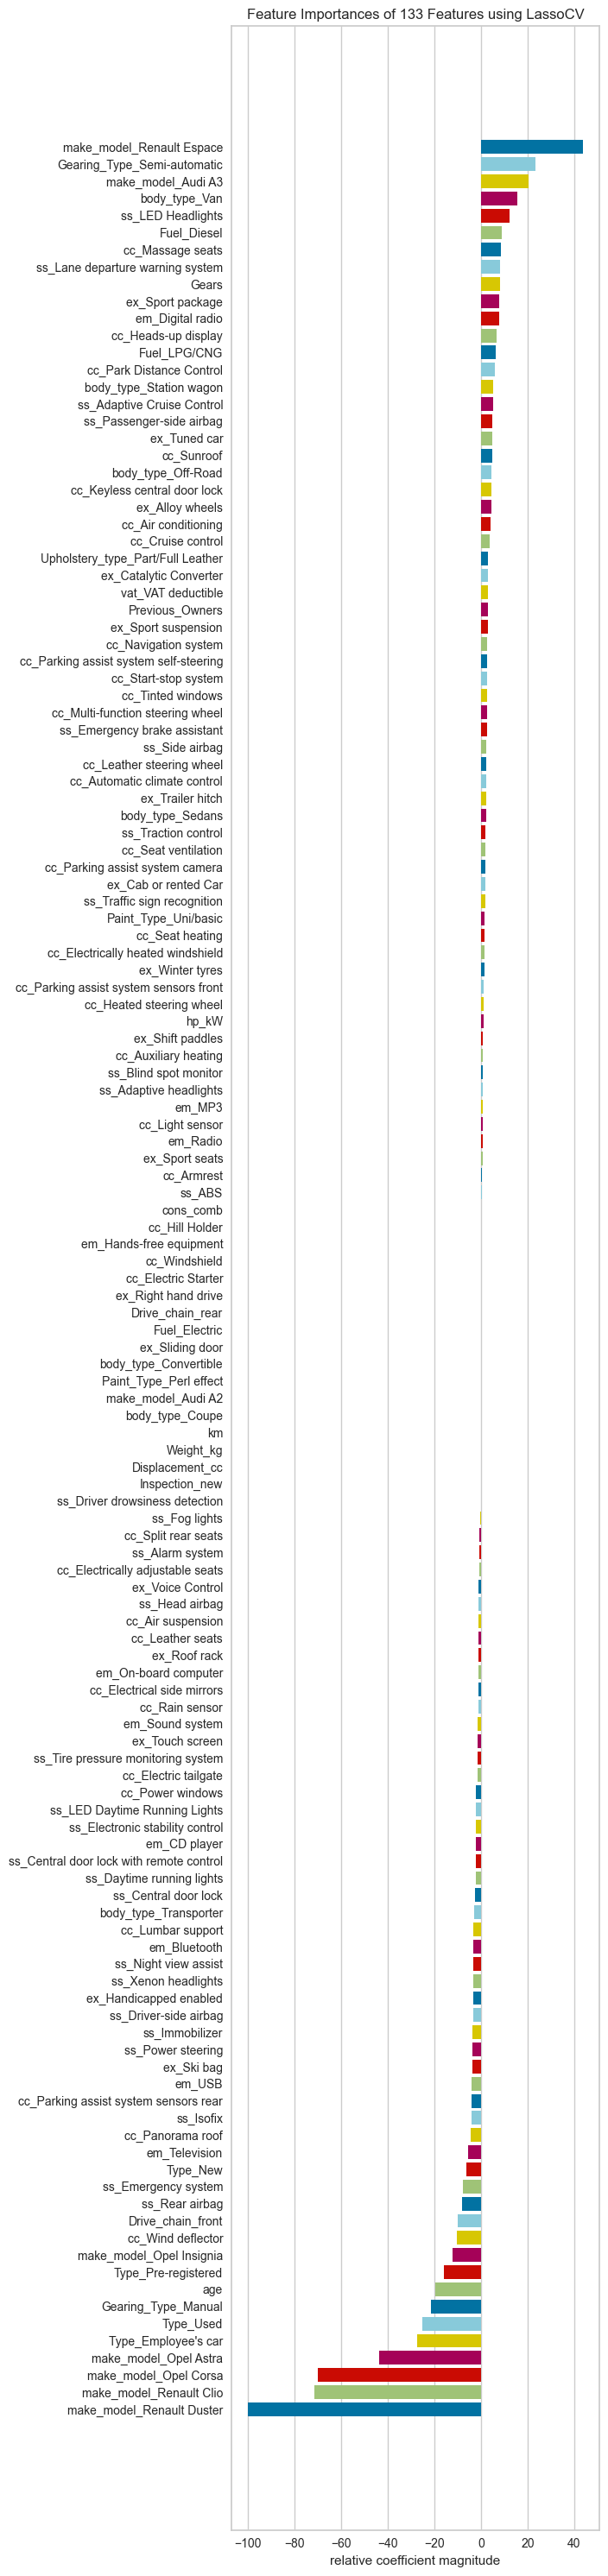

<Axes: title={'center': 'Feature Importances of 133 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [477]:
viz = FeatureImportances(lasso_cv, labels = pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720,3000))
viz.fit(X_train, y_train)
viz.show()

In [266]:
df.iloc[:,[0,3,4, 5,6,7,9,14,15,29]]

,make_model,vat,km,Type,Fuel,Gears,Previous_Owners,Gearing_Type,Displacement_cc,Electrically heated windshield
0,0,1,56013.000000,4,1,7.0,2.0,0,1422.0,0
1,0,0,80000.000000,4,0,7.0,1.0,0,1798.0,0
2,0,1,83450.000000,4,1,7.0,1.0,0,1598.0,0
3,0,1,73000.000000,4,1,6.0,1.0,0,1422.0,0
4,0,1,16200.000000,4,1,7.0,1.0,0,1422.0,0
...,...,...,...,...,...,...,...,...,...,...
15910,8,1,1647.362609,2,1,6.0,1.0,0,1997.0,0
15911,8,1,9900.000000,4,0,7.0,1.0,0,1798.0,1
15912,8,1,15.000000,3,1,6.0,1.0,0,1997.0,1
15913,8,1,10.000000,3,1,6.0,1.0,0,1997.0,0


## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
elastic_cv = ElasticNet(max_iter = 10000, random_state = 42)

In [269]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [270]:
grid_model = GridSearchCV(estimator= elastic_cv,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2)

In [271]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   4.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.4s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [272]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [273]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [274]:
gscv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gscv

,GridSearch_train,GridSearch_test
R2,8.448833e-01,8.411148e-01
mae,2.110798e+03,2.132470e+03
mse,8.532153e+06,8.320393e+06
rmse,2.920985e+03,2.884509e+03


## <font color='blue'> <b>Model Comparison</b><font color='black'>

In [275]:
pd.concat([lrr, rcv,lcv,ecv,gscv], axis = 1).round(3)

,linear_train,linear_test,Ridge_CV_train,Ridge_CV_test,lasso_cv_train,lasso_cv_test,elastic_cv_train,elastic_cv_test,GridSearch_train,GridSearch_test
R2,0.845,0.841,0.845,0.841,0.845,0.841,0.845,0.841,0.845,0.841
mae,2111.075,2133.080,2110.845,2132.580,2110.182,2130.678,2110.168,2130.087,2110.798,2132.470
mse,8531986.797,8324429.396,8532211.708,8321343.862,8535844.522,8308631.582,8539871.264,8306538.581,8532152.637,8320392.735
rmse,2920.956,2885.209,2920.995,2884.674,2921.617,2882.470,2922.306,2882.107,2920.985,2884.509


## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42